<a href="https://colab.research.google.com/github/chitinglow/Classification-Machine-learning/blob/master/Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import datetime
import time
import os
import numpy as np
import requests
import sklearn
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Set plot appearance
%config InlineBackend.figure_format = 'retina'
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [5]:
from sklearn import datasets
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
boston['data'].shape

(506, 13)

In [11]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'],)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df['MEDV'] = boston['target']
y = df['MEDV'].copy()

In [14]:
del df['MEDV']
df = pd.concat((y, df), axis=1)
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [16]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [18]:
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
  del df[col]

df.head()

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT
0,24.0,0.00632,2.31,0.0,6.575,65.2,4.0900,296.0,4.98
1,21.6,0.02731,7.07,0.0,6.421,78.9,4.9671,242.0,9.14
2,34.7,0.02729,7.07,0.0,7.185,61.1,4.9671,242.0,4.03
3,33.4,0.03237,2.18,0.0,6.998,45.8,6.0622,222.0,2.94
4,36.2,0.06905,2.18,0.0,7.147,54.2,6.0622,222.0,5.33


In [20]:
## Analyze data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700


In [21]:
## Correlation
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']
df[cols].tail()

,RM,AGE,TAX,LSTAT,MEDV
501,6.593,69.1,273.0,9.67,22.4
502,6.120,76.7,273.0,9.08,20.6
503,6.976,91.0,273.0,5.64,23.9
504,6.794,89.3,273.0,6.48,22.0
505,6.030,80.8,273.0,7.88,11.9


In [22]:
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


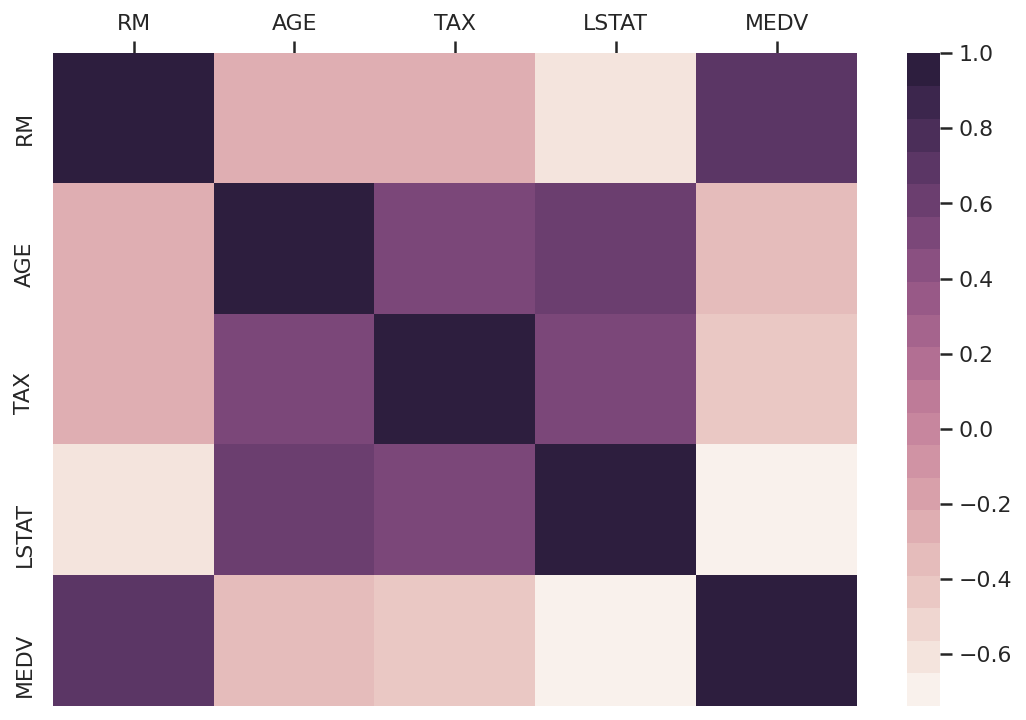

In [23]:
ax = sns.heatmap(df[cols].corr(), cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15),)
ax.xaxis.tick_top()
plt.show()

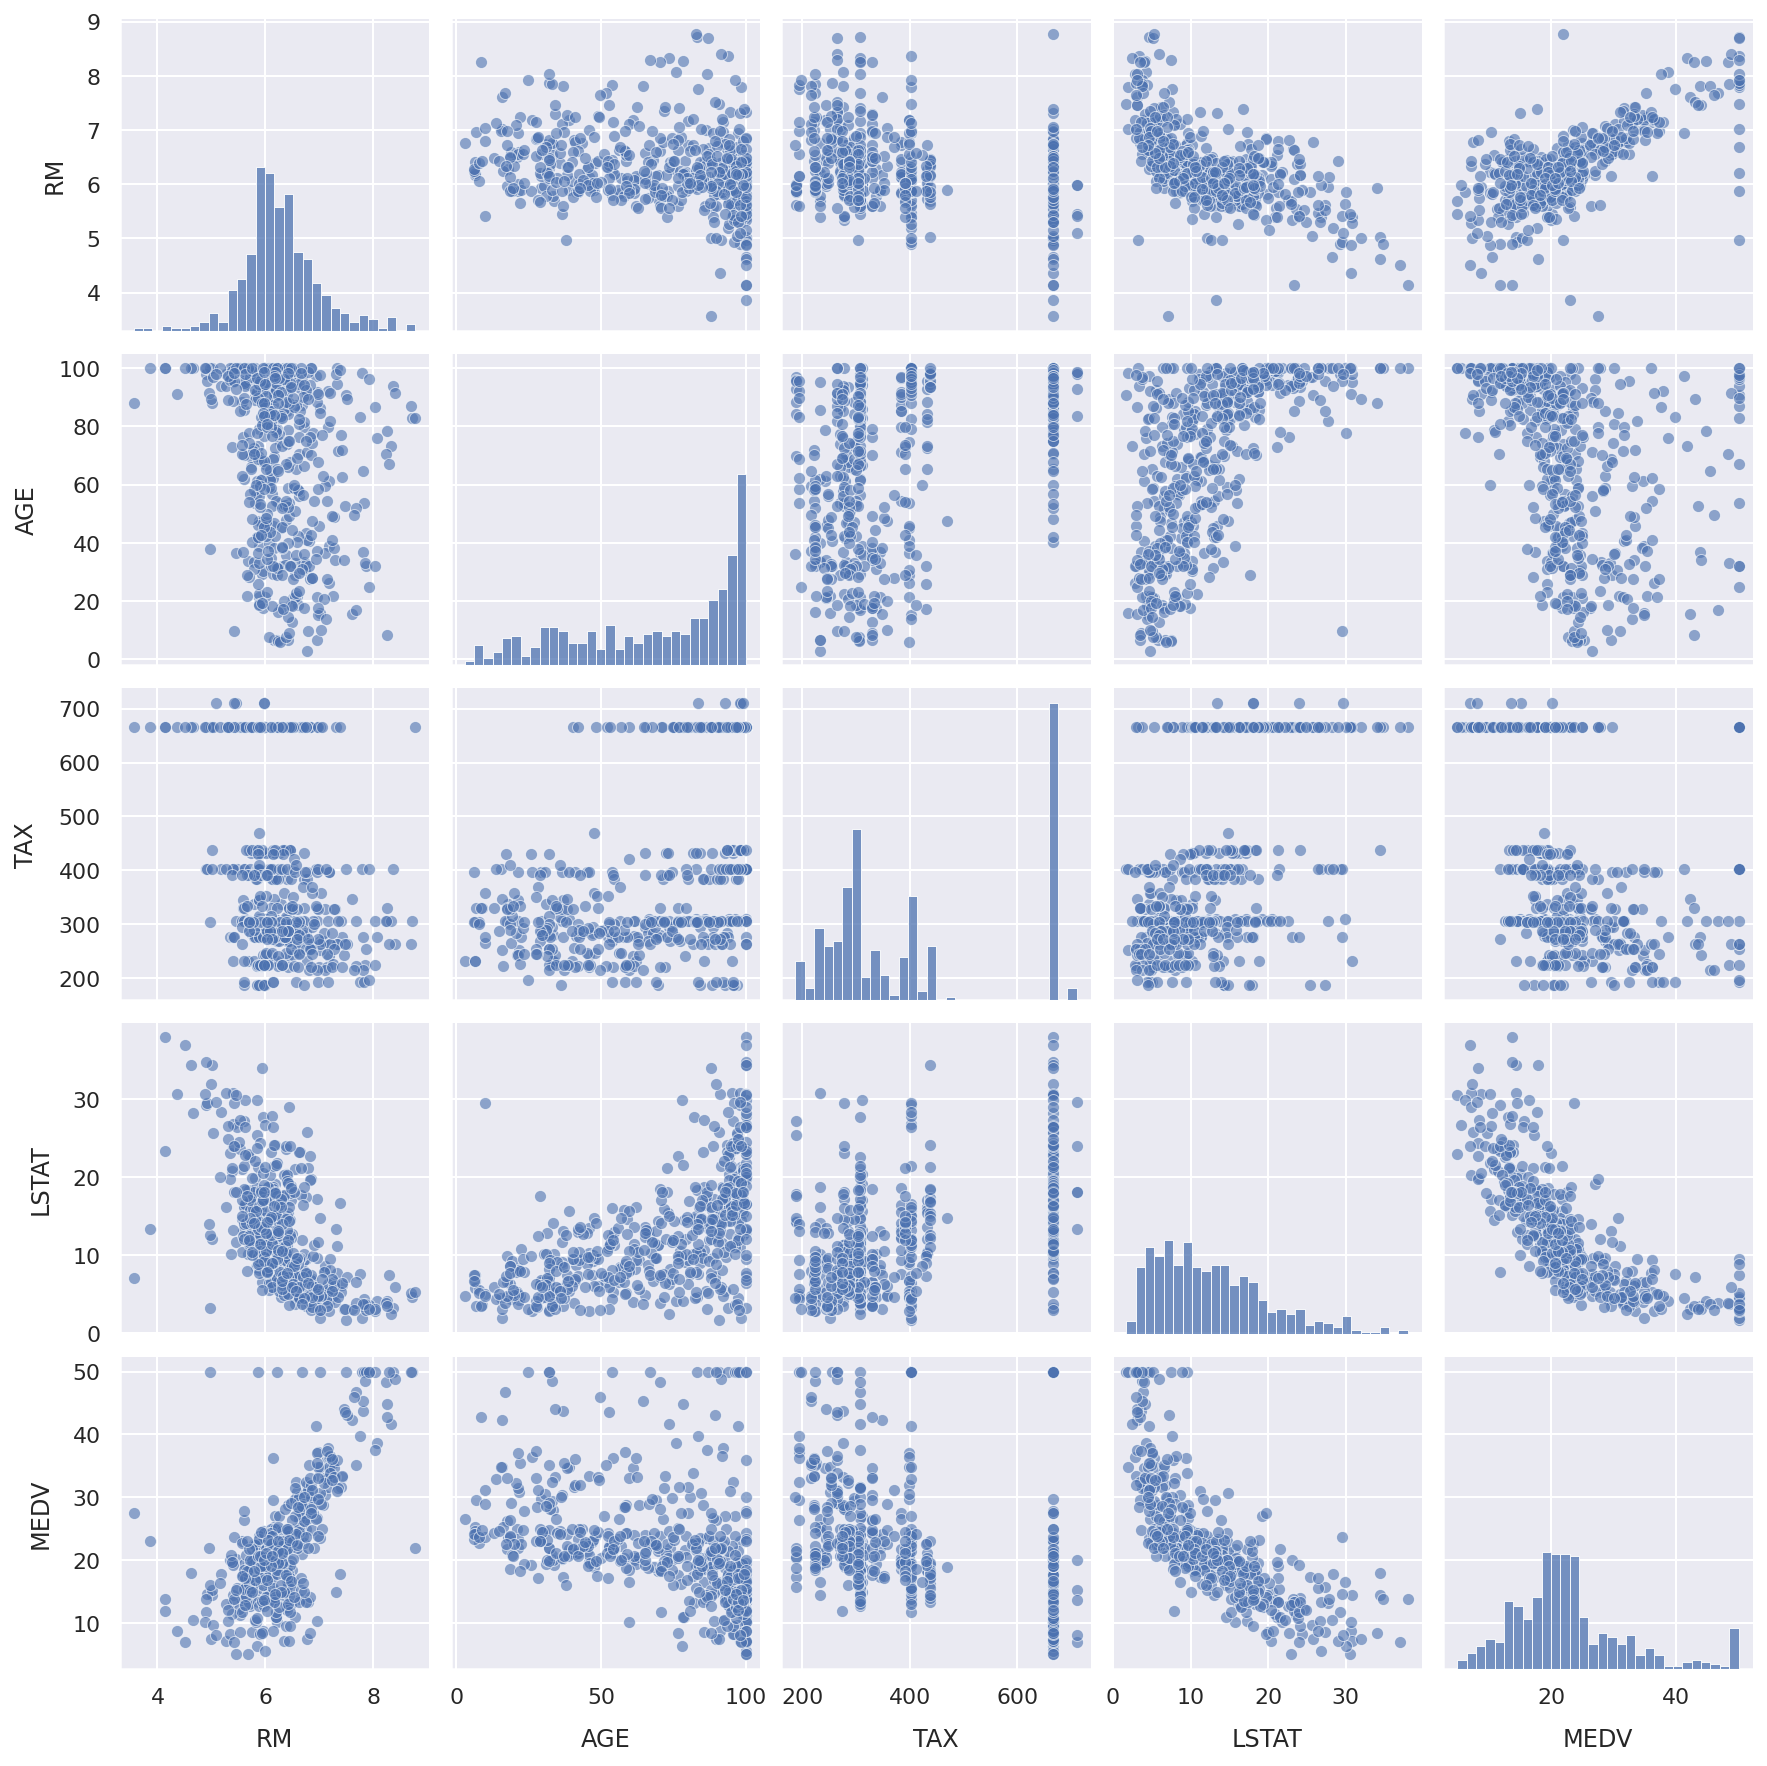

In [24]:
sns.pairplot(df[cols], plot_kws={'alpha':0.6}, diag_kws={'bins':30},)
plt.show()

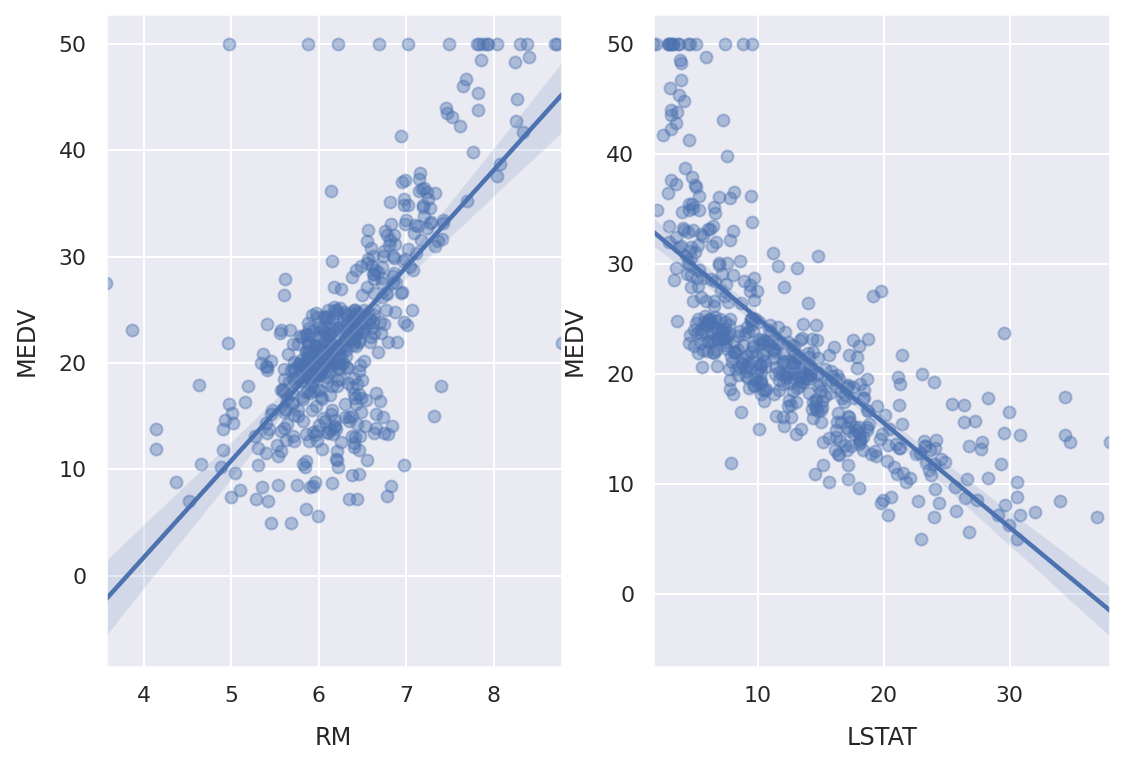

In [26]:
# Regression
fig, ax = plt.subplots(1,2)
sns.regplot(x='RM', y='MEDV', data = df, ax=ax[0], scatter_kws={'alpha':0.4},)
sns.regplot(x='LSTAT', y='MEDV', data = df, ax=ax[1], scatter_kws={'alpha':0.4},)
plt.show()

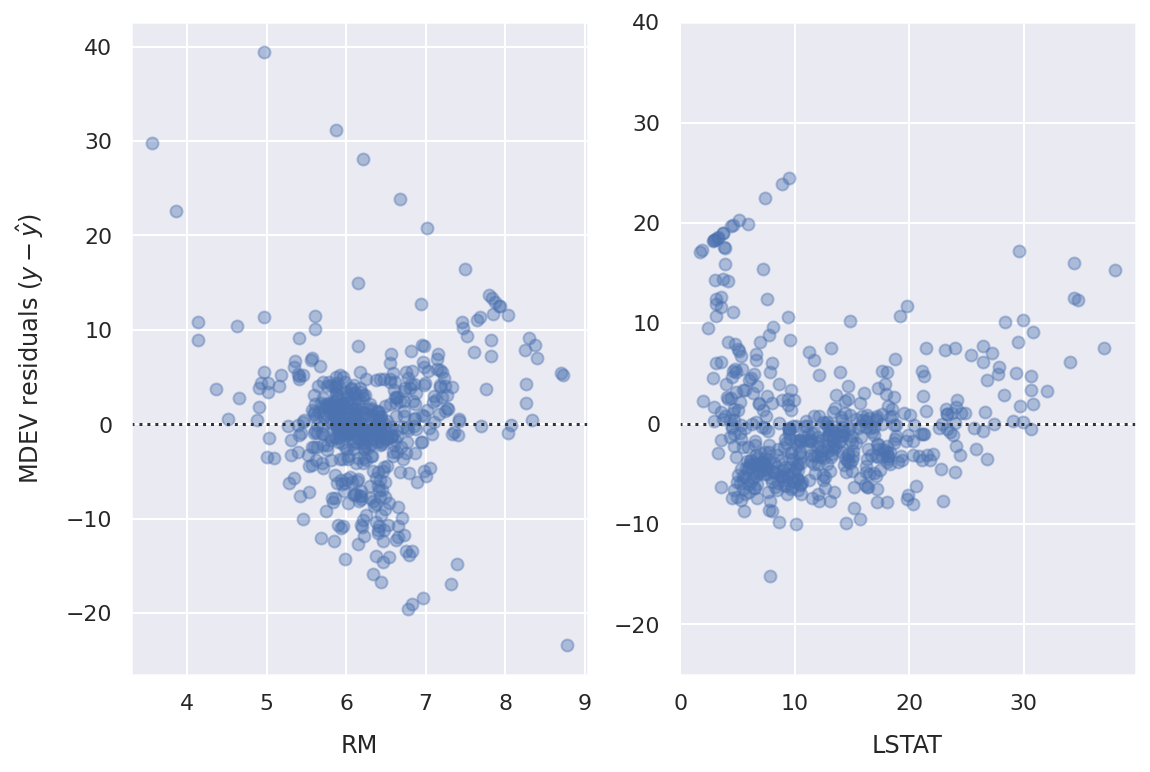

In [27]:
# Residual plots

fig, ax = plt.subplots(1, 2)
ax[0] = sns.residplot(
    x='RM',
    y='MEDV',
    data=df,
    ax=ax[0], scatter_kws={'alpha': 0.4},
)
ax[0].set_ylabel('MDEV residuals $(y-\hat{y})$')
ax[1] = sns.residplot(
    x='LSTAT',
    y='MEDV',
    data=df,
    ax=ax[1], scatter_kws={'alpha': 0.4},
)
ax[1].set_ylabel('')
plt.ylim(-25, 40)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def get_mse(df, feature, target='MEDV'):
    # Get x, y to model
    y = df[target].values
    x = df[feature].values.reshape(-1,1)
    print('{} ~ {}'.format(target, feature))
    
    # Build and fit the model
    lm = LinearRegression()
    lm.fit(x, y)
    msg = (
        'model: y = {:.3f} + {:.3f}x'
        .format(lm.intercept_, lm.coef_[0])
    )
    print(msg)
    
    # Predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

get_mse(df, 'RM')
get_mse(df, 'LSTAT')

MEDV ~ RM
model: y = -34.671 + 9.102x
mse = 43.60

MEDV ~ LSTAT
model: y = 34.554 + -0.950x
mse = 38.48



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


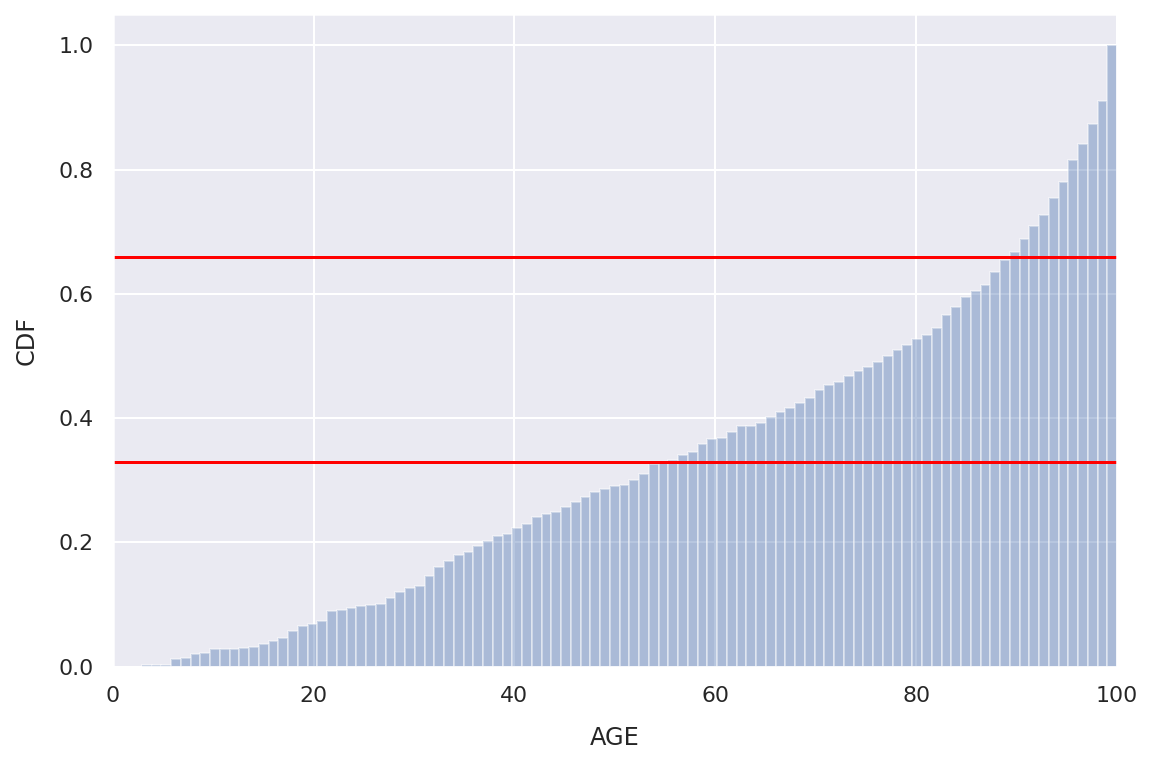

In [31]:
## Categorical feature segmentation analysis
#Plot cumulative distribution to find places to split data

sns.distplot(
    df.AGE.values,
    bins=100,
    hist_kws={'cumulative': True},
    kde_kws={'lw': 0},
)
plt.xlabel('AGE')
plt.ylabel('CDF')
plt.axhline(0.33, color='red')
plt.axhline(0.66, color='red')
plt.xlim(0, df.AGE.max())
plt.show()

In [32]:
# Categorize AGE into 3 bins

def get_age_category(x):
    if x < 50:
        age = 'Relatively New'
    elif 50 <= x < 85:
        age = 'Relatively Old'
    else:
        age = 'Very Old'
    return age

df['AGE_category'] = df.AGE.apply(get_age_category)

# Check the segmented counts
df.groupby('AGE_category').size()

AGE_category
Relatively New    147
Relatively Old    149
Very Old          210
dtype: int64

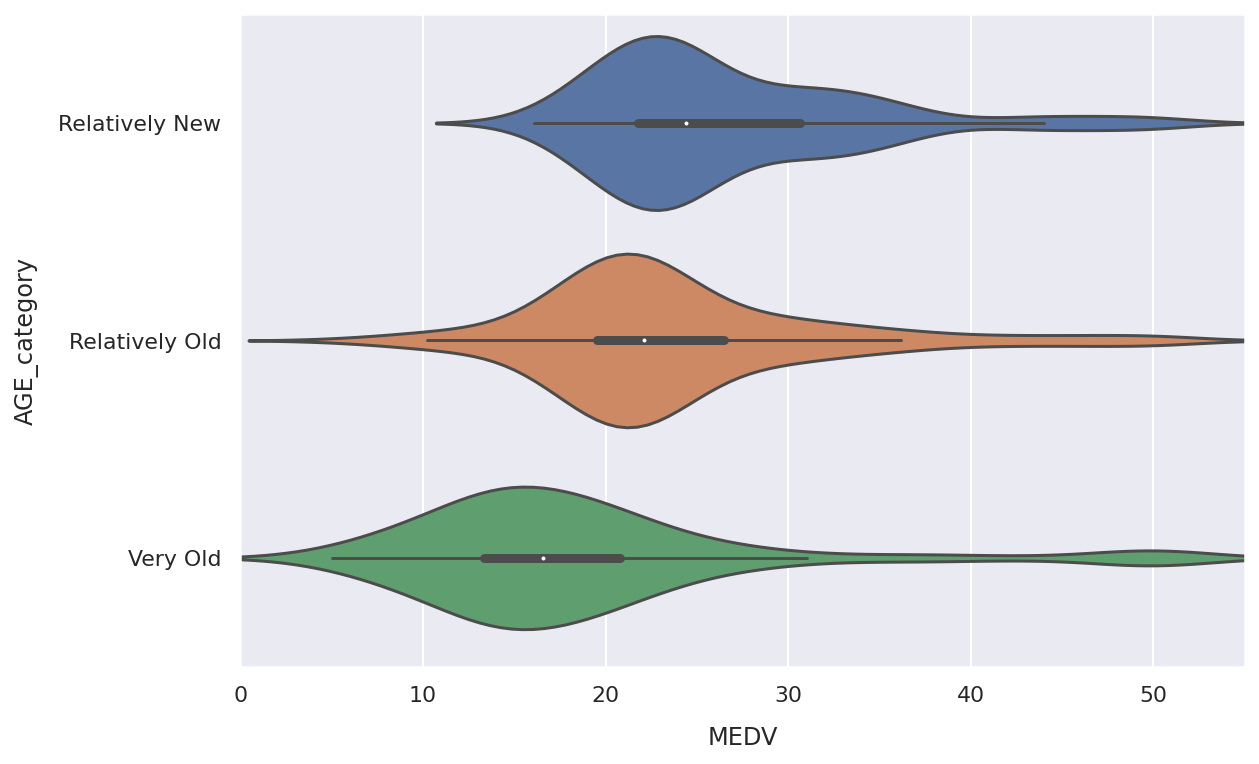

In [33]:
# How is MEDV distributed for each age category

sns.violinplot(
    x='MEDV',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
)
plt.xlim(0, 55)
plt.show()

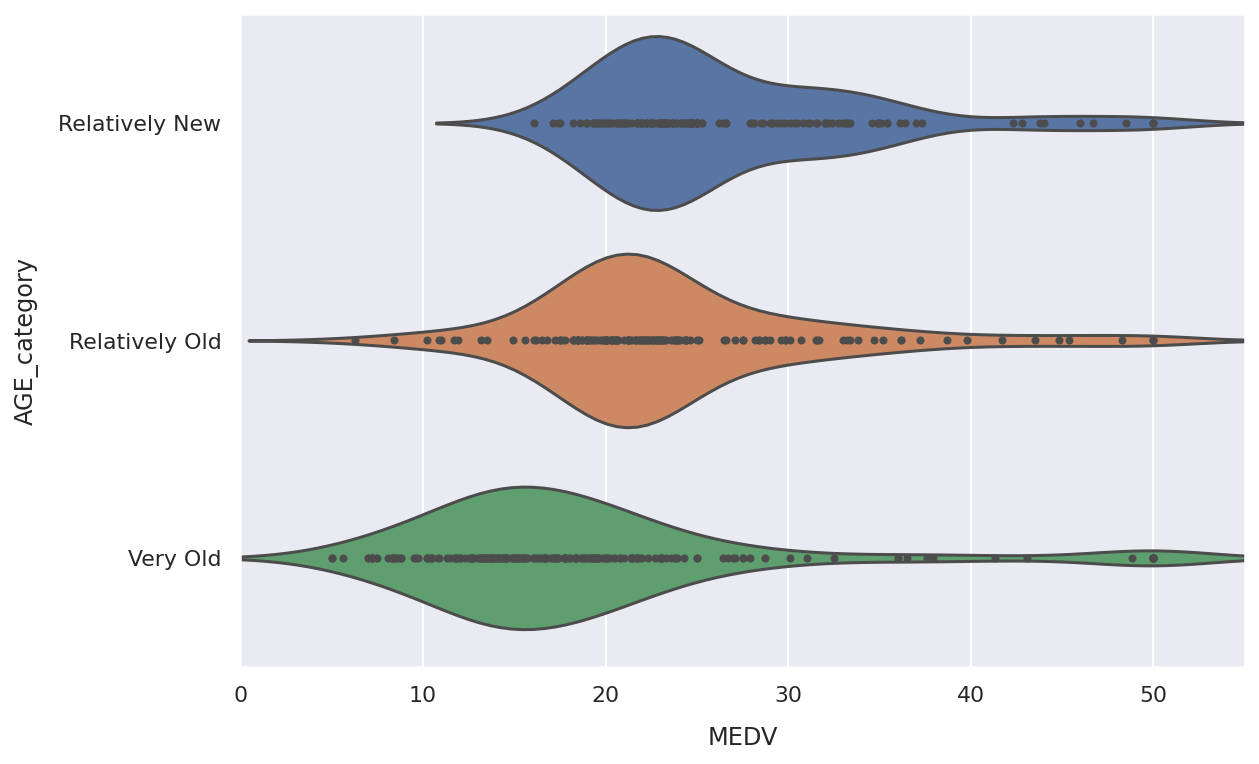

In [34]:
# Plotting the individual points

sns.violinplot(
    x='MEDV',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
    inner='point',
)
plt.xlim(0, 55)
plt.show()

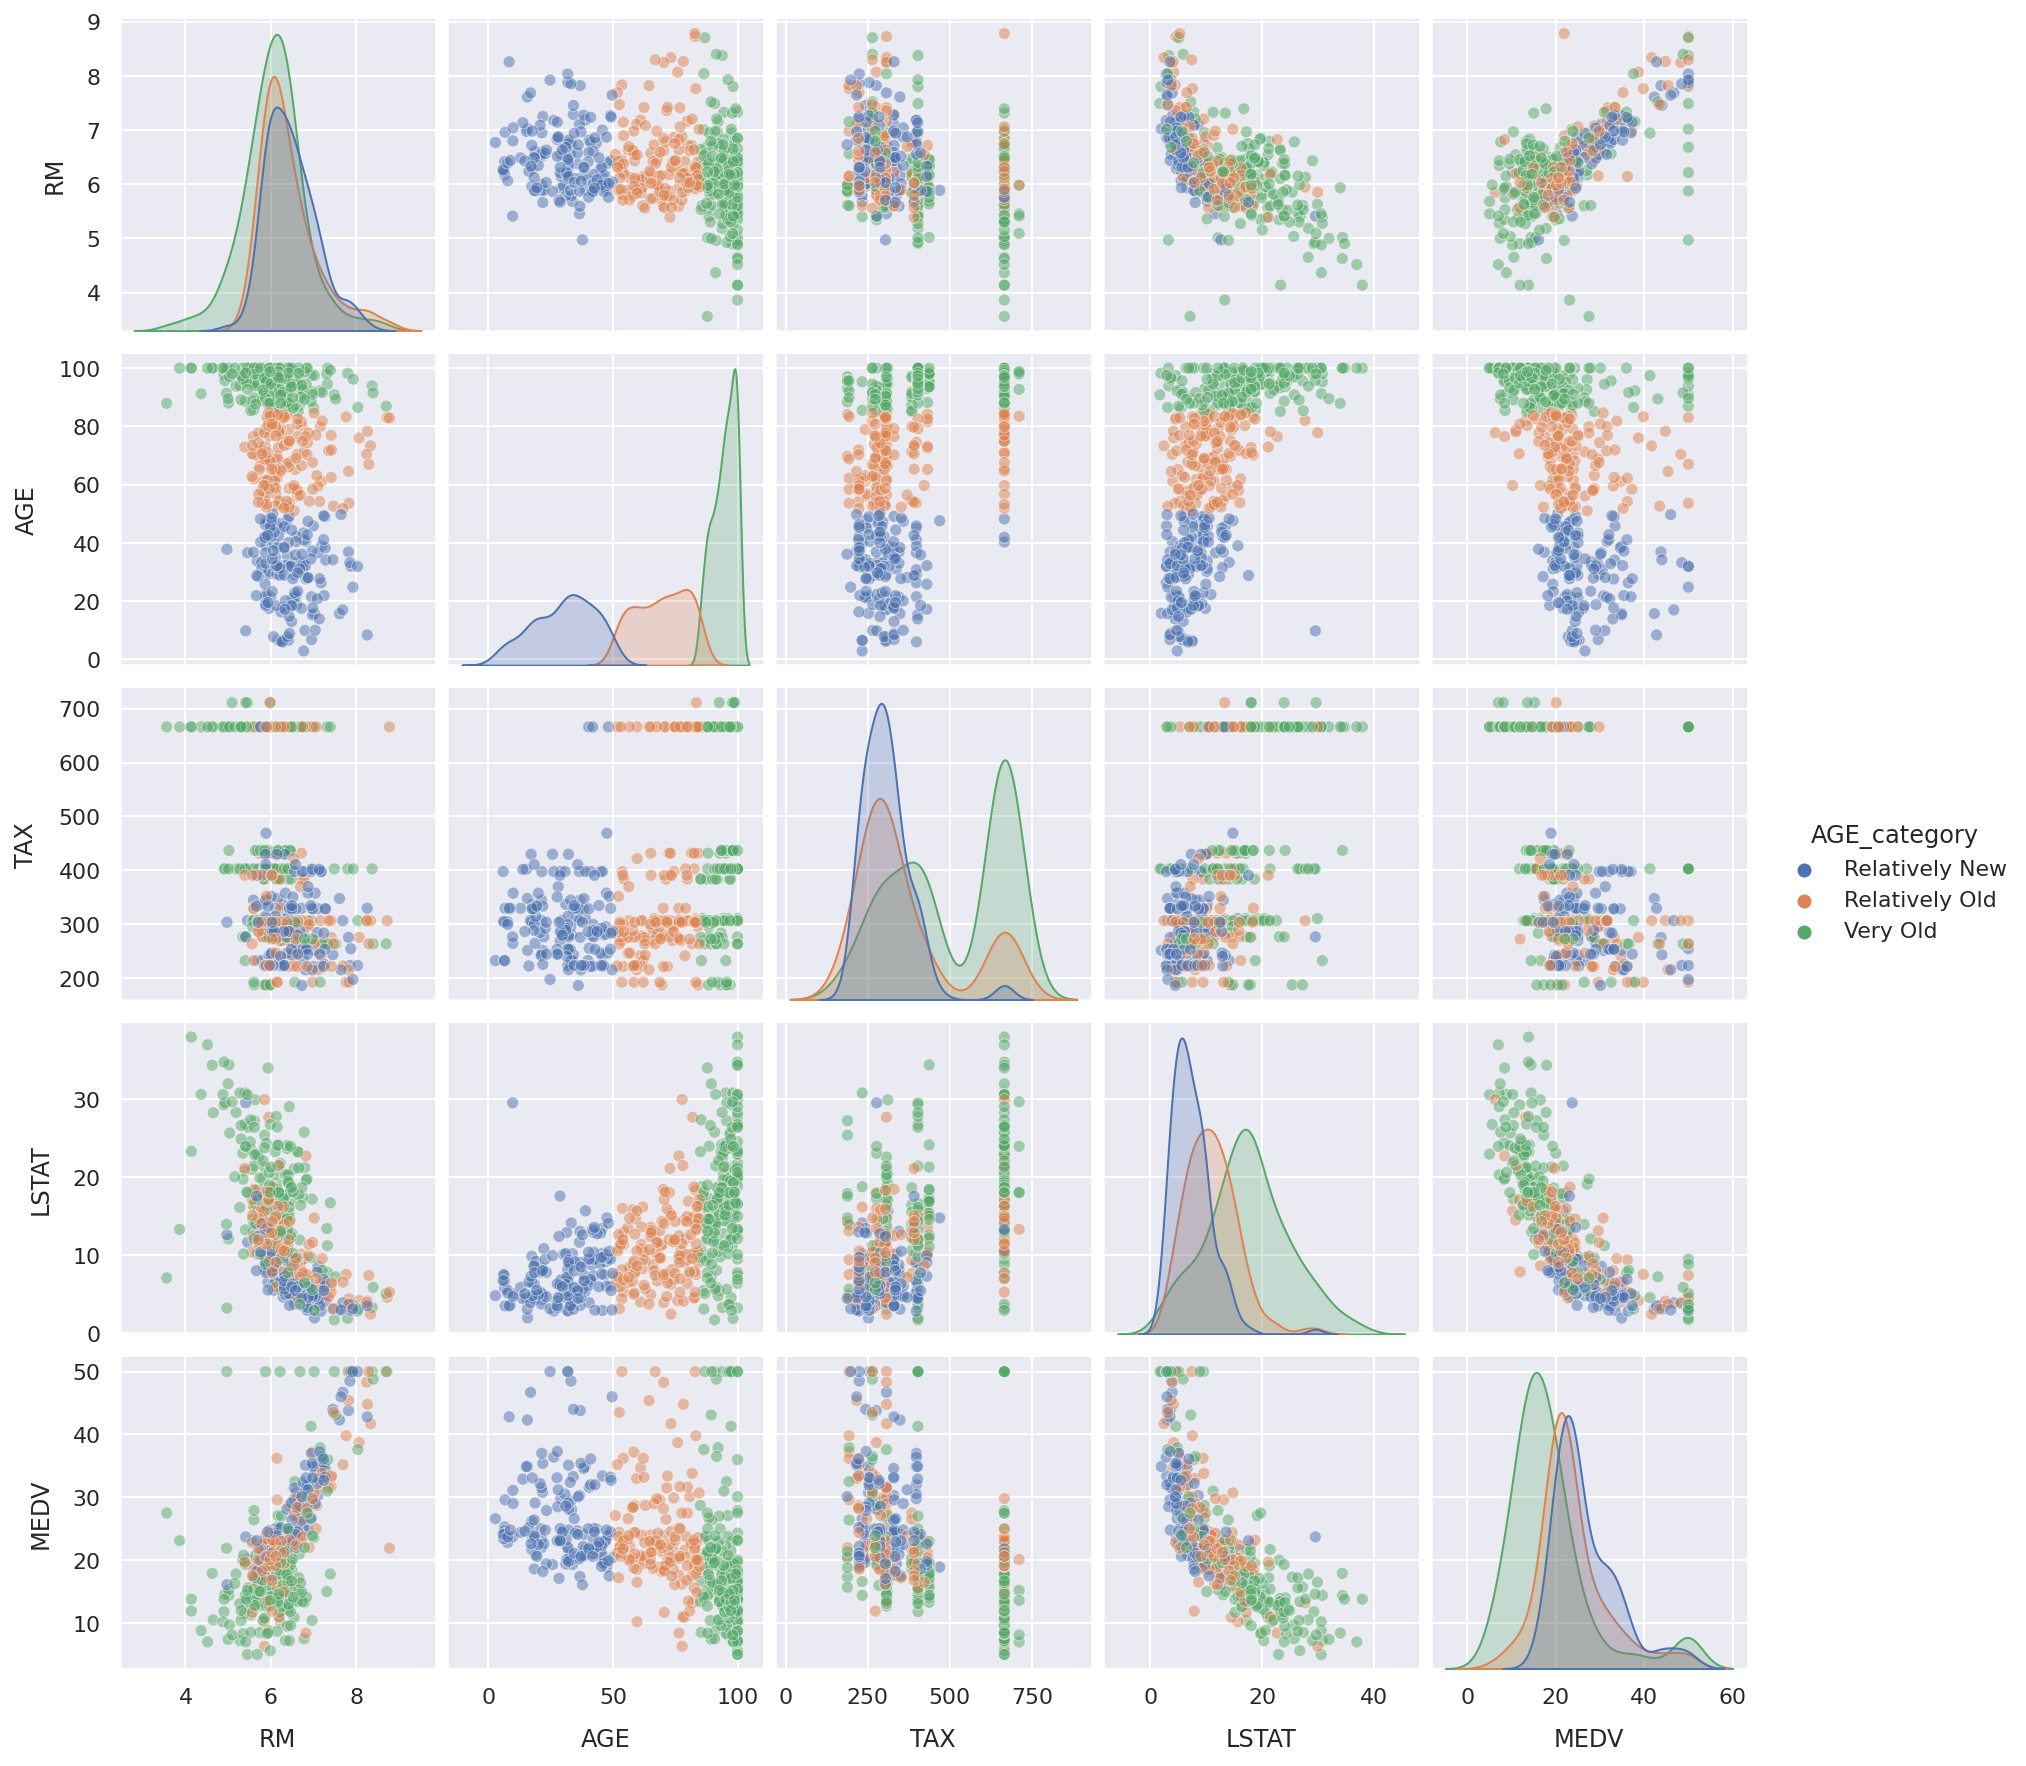

In [36]:
#Color-segmented pair plot

cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV', 'AGE_category']
sns.pairplot(
    df[cols],
    hue='AGE_category',
    hue_order=['Relatively New', 'Relatively Old', 'Very Old'],
    plot_kws={'alpha': 0.5},
)
plt.show()

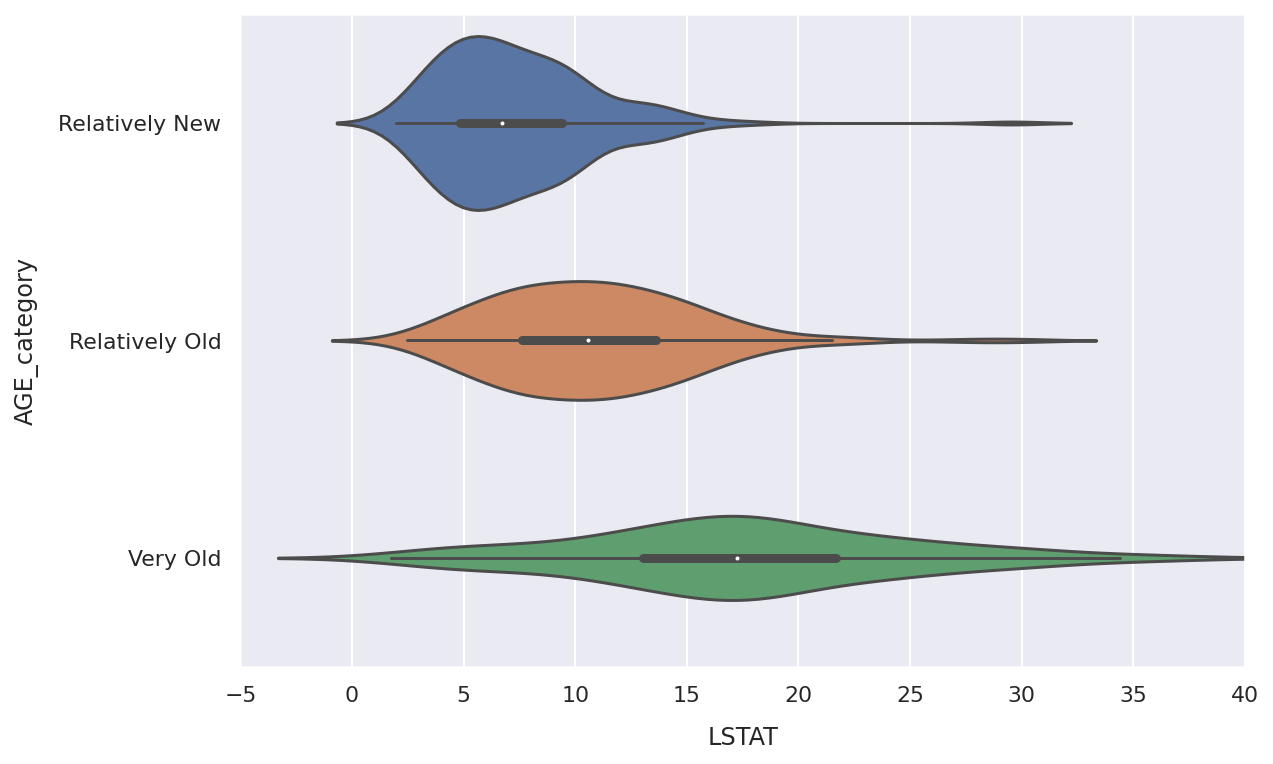

In [37]:
# Look at LSTAT by segment in more detail

sns.violinplot(
    x='LSTAT',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
)
plt.xlim(-5, 40)
plt.show()

In [38]:
from sklearn import datasets
boston = datasets.load_boston()
df = pd.DataFrame(
    data=boston['data'],
    columns=boston['feature_names'],
)
df['MEDV'] = boston['target']
y = df['MEDV'].values
x = df['LSTAT'].values.reshape(-1,1)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [40]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=False)
clf.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [41]:
x_0, x_1, x_2, x_3 = clf.coef_
msg = (
    'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'
    .format(x_0, x_1, x_2, x_3)
)
print(msg)

model: y = 48.650 + -3.866x + 0.149x^2 + -0.002x^3


In [42]:
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred

In [43]:
resid_MEDV[:10]

array([-8.84025736, -2.61360313, -0.65577837, -5.11949581,  4.23191217,
       -3.56387056,  3.16728909, 12.00336372,  4.03348935,  2.87915437])

In [44]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y, y_pred)

In [45]:
print('mse = {:.2f}'.format(error))

mse = 28.88


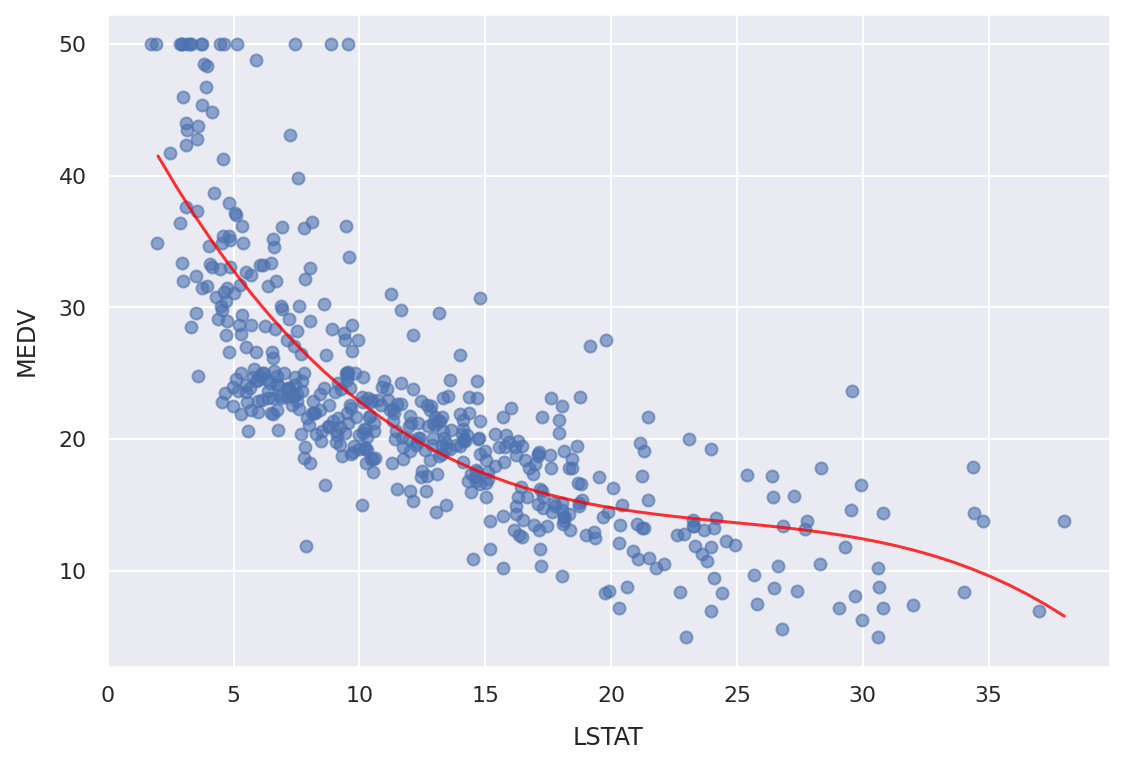

In [46]:
fig, ax = plt.subplots()

# Plot the samples
ax.scatter(x.flatten(), y, alpha=0.6)

# Plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1)
x_poly = poly.fit_transform(x_)
y_ = clf.predict(x_poly)
ax.plot(x_, y_, color='red', alpha=0.8)

ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
plt.show()

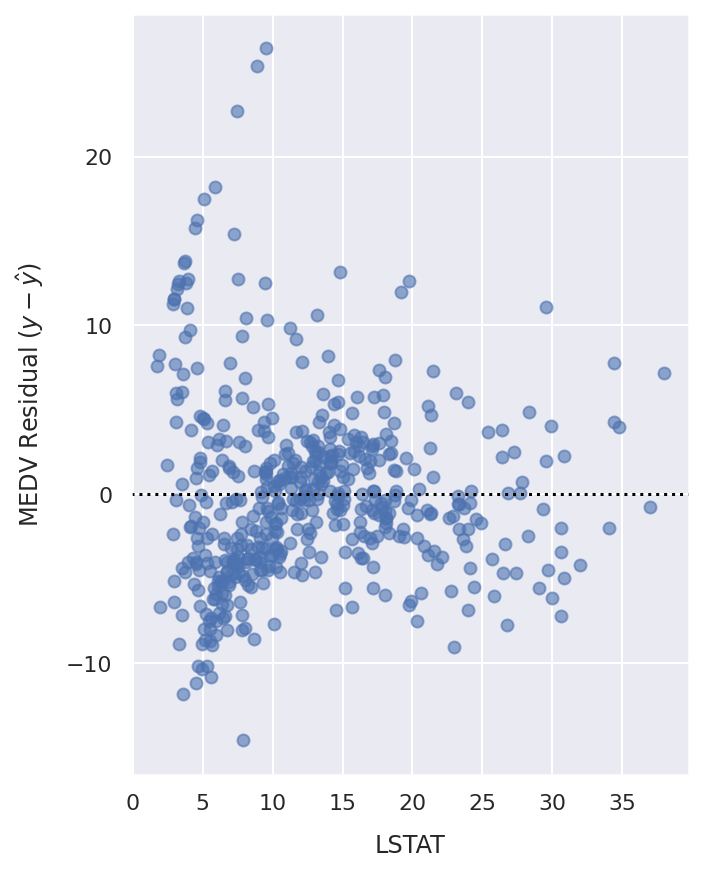

In [47]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x, resid_MEDV, alpha=0.6)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV Residual $(y-\hat{y})$')
plt.axhline(0, color='black', ls='dotted')
plt.show()